In [161]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sqlalchemy import engine
from pandasql import sqldf


In [162]:
# Función Lambda que hace escribir funcines en SQL mas fácil.
pysqldf = lambda q: sqldf(q, globals())

In [163]:
df_canceladas = pd.read_csv('../data/silver/canceladas_general.csv')
df_concretadas = pd.read_csv('../data/silver/concretadas_general.csv')
sales = pd.read_csv('../data/silver/Sales Transaction v.4a1.csv')

In [164]:
sales

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [165]:
df_canceladas.head()


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,C581484,12/9/2019,23843,Paper Craft Little Birdie,6.19,-80995,16446.0,United Kingdom
1,C581490,12/9/2019,22178,Victorian Glass Hanging T-Light,6.19,-12,14397.0,United Kingdom
2,C581490,12/9/2019,23144,Zinc T-Light Holder Stars Small,6.04,-11,14397.0,United Kingdom
3,C581568,12/9/2019,21258,Victorian Sewing Box Large,6.19,-5,15311.0,United Kingdom
4,C581569,12/9/2019,84978,Hanging Heart Jar T-Light Holder,6.19,-1,17315.0,United Kingdom


In [166]:
sales

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [167]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [168]:
sales.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


In [169]:
sales.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [170]:
df_concretadas.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [171]:
df_australia = df_canceladas[df_canceladas['Country'] == 'Australia'
                             ]

In [172]:
df_australia

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
1289,C574019,11/2/2019,22738,Ribbon Reel Snowy Village,11.74,-120,12415.0,Australia
2579,C568694,9/28/2019,22090,Paper Bunting Retrospot,13.27,-12,16321.0,Australia
2580,C568694,9/28/2019,21198,White Heart Confetti In Tube,11.94,-24,16321.0,Australia
3887,C561227,7/26/2019,84978,Hanging Heart Jar T-Light Holder,11.34,-36,12431.0,Australia
4029,C560540,7/19/2019,21843,Red Retrospot Cake Stand,21.47,-1,12415.0,Australia
...,...,...,...,...,...,...,...,...
7166,C543375,2/7/2019,22325,Mobile Vintage Hearts,15.32,-3,16321.0,Australia
7167,C543375,2/7/2019,22087,Paper Bunting White Lace,13.27,-18,16321.0,Australia
8156,C538723,12/14/2018,22333,Retrospot Party Bag + Sticker Set,11.94,-7,12434.0,Australia
8157,C538723,12/14/2018,22094,Red Retrospot Tissue Box,11.53,-5,12434.0,Australia


In [173]:
df_canceladas_australia = sales[(sales['Country'] == 'Australia') & (sales['TransactionNo'].str.contains('C', case = False))]

In [174]:
df_canceladas_australia

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
107617,C574019,11/2/2019,22738,Ribbon Reel Snowy Village,11.74,-120,12415.0,Australia
176763,C568694,9/28/2019,22090,Paper Bunting Retrospot,13.27,-12,16321.0,Australia
176764,C568694,9/28/2019,21198,White Heart Confetti In Tube,11.94,-24,16321.0,Australia
260614,C561227,7/26/2019,84978,Hanging Heart Jar T-Light Holder,11.34,-36,12431.0,Australia
270062,C560540,7/19/2019,21843,Red Retrospot Cake Stand,21.47,-1,12415.0,Australia
...,...,...,...,...,...,...,...,...
454033,C543375,2/7/2019,22325,Mobile Vintage Hearts,15.32,-3,16321.0,Australia
454034,C543375,2/7/2019,22087,Paper Bunting White Lace,13.27,-18,16321.0,Australia
507570,C538723,12/14/2018,22333,Retrospot Party Bag + Sticker Set,11.94,-7,12434.0,Australia
507571,C538723,12/14/2018,22094,Red Retrospot Tissue Box,11.53,-5,12434.0,Australia


In [175]:
df_canceladas_unitedKingdom = sales[(sales['Country'] == 'United Kingdom') & (sales['TransactionNo'].str.contains('C', case = False))]

In [176]:
df_canceladas_unitedKingdom

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
1616,C581484,12/9/2019,23843,Paper Craft Little Birdie,6.19,-80995,16446.0,United Kingdom
1617,C581490,12/9/2019,22178,Victorian Glass Hanging T-Light,6.19,-12,14397.0,United Kingdom
1618,C581490,12/9/2019,23144,Zinc T-Light Holder Stars Small,6.04,-11,14397.0,United Kingdom
1619,C581568,12/9/2019,21258,Victorian Sewing Box Large,6.19,-5,15311.0,United Kingdom
1620,C581569,12/9/2019,84978,Hanging Heart Jar T-Light Holder,6.19,-1,17315.0,United Kingdom
...,...,...,...,...,...,...,...,...
536331,C536391,12/1/2018,22557,Plasters In Tin Vintage Paisley,11.94,-12,17548.0,United Kingdom
536332,C536391,12/1/2018,22553,Plasters In Tin Skulls,11.94,-24,17548.0,United Kingdom
536333,C536506,12/1/2018,22960,Jam Making Set With Jars,14.61,-6,17897.0,United Kingdom
536334,C536543,12/1/2018,22632,Hand Warmer Red Retrospot,12.40,-1,17841.0,United Kingdom


In [177]:
df_canceladas_general = sales[(sales['TransactionNo'].str.contains('C', case = False))]

In [178]:
df_canceladas_general

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
1616,C581484,12/9/2019,23843,Paper Craft Little Birdie,6.19,-80995,16446.0,United Kingdom
1617,C581490,12/9/2019,22178,Victorian Glass Hanging T-Light,6.19,-12,14397.0,United Kingdom
1618,C581490,12/9/2019,23144,Zinc T-Light Holder Stars Small,6.04,-11,14397.0,United Kingdom
1619,C581568,12/9/2019,21258,Victorian Sewing Box Large,6.19,-5,15311.0,United Kingdom
1620,C581569,12/9/2019,84978,Hanging Heart Jar T-Light Holder,6.19,-1,17315.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [179]:
df_canceladas_austria = sales[(sales['Country'] == 'Austria') & (sales['TransactionNo'].str.contains('C', case = False))]

In [180]:
df_canceladas_austria

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
313520,C556793,6/14/2019,22697,Green Regency Teacup And Saucer,13.27,-1,12818.0,Austria
313521,C556793,6/14/2019,22357,Kings Choice Biscuit Tin,14.61,-5,12818.0,Austria
505506,C538971,12/15/2018,22153,Angel Decoration Stars On Dress,10.68,-48,12865.0,Austria


In [181]:
df_canceladas_bahrain = sales[(sales['Country'] == 'Bahrain') & (sales['TransactionNo'].str.contains('C', case = False))]

In [182]:
df_canceladas_bahrain

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country


In [183]:
df_canceladas_belgium = sales[(sales['Country'] == 'Belgium') & (sales['TransactionNo'].str.contains('C', case = False))]

In [184]:
df_canceladas_belgium

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
22444,C580168,12/2/2019,22628,Picnic Boxes Set Of 3 Retrospot,6.19,-1,12465.0,Belgium
22445,C580168,12/2/2019,22321,Bird Decoration Red Retrospot,6.19,-1,12465.0,Belgium
22446,C580168,12/2/2019,22601,Christmas Retrospot Angel Wood,6.19,-1,12465.0,Belgium
22447,C580168,12/2/2019,22329,Round Container Set Of 5 Retrospot,6.19,-1,12465.0,Belgium
36364,C579178,11/28/2019,22941,Christmas Lights 10 Reindeer,6.19,-2,12362.0,Belgium
36365,C579178,11/28/2019,22942,Christmas Lights 10 Santas,6.19,-2,12362.0,Belgium
36366,C579178,11/28/2019,22943,Christmas Lights 10 Vintage Baubles,6.19,-3,12362.0,Belgium
45739,C578432,11/24/2019,21559,Strawberry Lunch Box With Cutlery,6.04,-1,12395.0,Belgium
84168,C575669,11/10/2019,23462,Rococo Wall Mirror White,30.70,-1,12417.0,Belgium
127069,C572532,10/24/2019,22960,Jam Making Set With Jars,14.61,-1,12380.0,Belgium


In [185]:
df_canceladas_brazil = sales[(sales['Country'] == 'Brazil') & (sales['TransactionNo'].str.contains('C', case = False))]

In [186]:
df_canceladas_brazil

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country


In [187]:
df_concretadas_brazil = sales[(sales['Country'] == 'Brazil') & (~sales['TransactionNo'].str.contains('C', case = False))]

In [188]:
df_concretadas_general = sales[(~sales['TransactionNo'].str.contains('C', case = False))]


In [189]:
df_concretadas_general

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536320,536585,12/1/2018,37449,Ceramic Cake Stand + Hanging Cakes,20.45,2,17460.0,United Kingdom
536321,536590,12/1/2018,22776,Sweetheart 3 Tier Cake Stand,20.45,1,13065.0,United Kingdom
536322,536590,12/1/2018,22622,Box Of Vintage Alphabet Blocks,20.45,2,13065.0,United Kingdom
536323,536591,12/1/2018,37449,Ceramic Cake Stand + Hanging Cakes,20.45,1,14606.0,United Kingdom


In [190]:
df_concretadas_general.to_csv('concretadas_general.csv', index = False)


In [191]:
df_concretadas_brazil

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
379818,550201,4/15/2019,22699,Roses Regency Teacup And Saucer,12.86,24,12769.0,Brazil
379819,550201,4/15/2019,22697,Green Regency Teacup And Saucer,12.86,24,12769.0,Brazil
379820,550201,4/15/2019,22698,Pink Regency Teacup And Saucer,12.86,24,12769.0,Brazil
379821,550201,4/15/2019,22366,Doormat Airmail,17.17,10,12769.0,Brazil
379822,550201,4/15/2019,21430,Set/3 Red Gingham Rose Storage Box,13.72,24,12769.0,Brazil
379823,550201,4/15/2019,22630,Dolly Girl Lunch Box,12.25,24,12769.0,Brazil
379824,550201,4/15/2019,22629,Spaceboy Lunch Box,12.25,12,12769.0,Brazil
379825,550201,4/15/2019,15056P,Edwardian Parasol Pink,16.35,3,12769.0,Brazil
379826,550201,4/15/2019,15056N,Edwardian Parasol Natural,16.35,3,12769.0,Brazil
379827,550201,4/15/2019,20679,Edwardian Parasol Red,16.35,3,12769.0,Brazil


In [192]:
df_canceladas_canada = sales[(sales['Country'] == 'Canada') & (sales['TransactionNo'].str.contains('C', case = False))]


In [193]:
df_canceladas_canada

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country


In [194]:
df_canceladas_channel_islands = sales[(sales['Country'] == 'Channel Islands') & (sales['TransactionNo'].str.contains('C', case = False))]


In [195]:
df_canceladas_channel_islands

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
6504,C581323,12/8/2019,21533,Retrospot Large Milk Jug,6.19,-1,14442.0,Channel Islands
28716,C579764,11/30/2019,20914,Set/5 Red Retrospot Lid Glass Bowls,6.19,-1,14936.0,Channel Islands
28717,C579764,11/30/2019,23486,Antique Heart Shelf Unit,6.19,-1,14936.0,Channel Islands
176737,C568579,9/28/2019,21314,Small Glass Heart Trinket Pot,12.40,-1,14934.0,Channel Islands
235167,C563610,8/18/2019,21216,Set 3 Retrospot Tea/Coffee/Sugar,14.61,-1,14937.0,Channel Islands
335041,C554688,5/25/2019,22637,Piggy Bank Retrospot,12.86,-1,14442.0,Channel Islands
335042,C554688,5/25/2019,23092,Large Antique White Photo Frame,18.35,-1,14442.0,Channel Islands
460930,C542734,1/31/2019,22169,Family Album White Picture Frame,18.96,-2,14442.0,Channel Islands
460931,C542734,1/31/2019,22170,Picture Frame Wood Triple Portrait,17.17,-2,14442.0,Channel Islands


In [196]:
df_canceladas_cyprus = sales[(sales['Country'] == 'Cyprus') & (sales['TransactionNo'].str.contains('C', case = False))]


In [197]:
df_canceladas_cyprus

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
22440,C580165,12/2/2019,22797,Chest Of Drawers Gingham Heart,6.19,-2,12359.0,Cyprus
22441,C580165,12/2/2019,23245,Set Of 3 Regency Cake Tins,6.19,-2,12359.0,Cyprus
22442,C580165,12/2/2019,22826,Love Seat Antique White Metal,6.19,-1,12359.0,Cyprus
22443,C580165,12/2/2019,22720,Set Of 3 Cake Tins Pantry Design,6.19,-1,12359.0,Cyprus
382623,C549955,4/13/2019,22839,3 Tier Cake Tin Green And Cream,25.57,-2,12359.0,Cyprus
383647,C549955,4/13/2019,22666,Recipe Box Pantry Yellow Design,13.27,-2,12359.0,Cyprus


In [198]:
df_canceladas_czeh_republic = sales[(sales['Country'] == 'Czech Republic') & (sales['TransactionNo'].str.contains('C', case = False))]


In [199]:
df_canceladas_czeh_republic

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
62315,C577151,11/18/2019,84459A,Pink Metal Chicken Heart,11.78,-24,12781.0,Czech Republic
62316,C577151,11/18/2019,22231,Jigsaw Tree With Birdhouse,11.74,-15,12781.0,Czech Republic
395776,C548667,4/1/2019,22231,Jigsaw Tree With Birdhouse,11.74,-15,12781.0,Czech Republic
395777,C548667,4/1/2019,84459A,Pink Metal Chicken Heart,11.78,-24,12781.0,Czech Republic


In [200]:
df_canceladas_denmark = sales[(sales['Country'] == 'Denmark') & (sales['TransactionNo'].str.contains('C', case = False))]


In [201]:
df_canceladas_denmark

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
140633,C571507,10/17/2019,16169E,Wrap 50'S Christmas,10.68,-25,13919.0,Denmark
140634,C571507,10/17/2019,23511,Embroidered Ribbon Reel Emily,12.38,-5,13919.0,Denmark
140635,C571507,10/17/2019,22961,Jam Making Set Printed,11.74,-2,13919.0,Denmark
140636,C571507,10/17/2019,21731,Red Toadstool Led Night Light,11.94,-3,13919.0,Denmark
140637,C571507,10/17/2019,22666,Recipe Box Pantry Yellow Design,13.27,-2,13919.0,Denmark
243795,C562728,8/9/2019,22849,Bread Bin Diner Style Mint,25.57,-1,12406.0,Denmark
243796,C562728,8/9/2019,22848,Bread Bin Diner Style Pink,25.57,-4,12406.0,Denmark
243797,C562728,8/9/2019,22846,Bread Bin Diner Style Red,25.57,-4,12406.0,Denmark


In [202]:
df_canceladas_eire = sales[(sales['Country'] == 'EIRE') & (sales['TransactionNo'].str.contains('C', case = False))]


In [203]:
df_canceladas_eire

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
25355,C580056,12/1/2019,22467,Gumball Coat Rack,6.19,-1,14911.0,EIRE
49308,C578136,11/23/2019,71477,Coloured Glass Star T-Light Holder,6.13,-2,14156.0,EIRE
49309,C578136,11/23/2019,23328,Set 6 School Milk Bottles In Crate,6.13,-1,14156.0,EIRE
49310,C578136,11/23/2019,23325,Rustic Strawberry Jam Pot Small,6.13,-5,14156.0,EIRE
49311,C578136,11/23/2019,23173,Regency Teapot Roses,6.13,-1,14156.0,EIRE
...,...,...,...,...,...,...,...,...
504171,C539221,12/16/2018,22592,Cardholder Holly Wreath Metal,14.09,-1,14911.0,EIRE
504172,C539221,12/16/2018,22941,Christmas Lights 10 Reindeer,18.96,-12,14911.0,EIRE
504173,C539221,12/16/2018,22942,Christmas Lights 10 Santas,18.96,-10,14911.0,EIRE
533249,C536817,12/2/2018,22187,Green Christmas Tree Card Holder,14.61,-1,14156.0,EIRE


In [204]:
df_canceladas_european = sales[(sales['Country'] == 'European Community') & (sales['TransactionNo'].str.contains('C', case = False))]


In [205]:
df_canceladas_european

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
317063,C556294,6/10/2019,22960,Jam Making Set With Jars,14.61,-2,15108.0,European Community


In [206]:
df_canceladas_finland = sales[(sales['Country'] == 'Finland') & (sales['TransactionNo'].str.contains('C', case = False))]


In [207]:
df_canceladas_finland

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
8925,C581071,12/7/2019,85099C,Jumbo Bag Baroque Black White,6.04,-1,12375.0,Finland
230500,C564108,8/23/2019,21216,Set 3 Retrospot Tea/Coffee/Sugar,15.32,-1,12428.0,Finland
389859,C549184,4/7/2019,37342,Polkadot Coffee Cup & Saucer Pink,11.06,-27,12428.0,Finland
389860,C549184,4/7/2019,21394,Red Polkadot Beaker,10.65,-2,12428.0,Finland
410972,C547234,3/21/2019,21537,Red Retrospot Pudding Bowl,14.61,-1,12428.0,Finland
410973,C547234,3/21/2019,21527,Red Retrospot Traditional Teapot,18.40,-1,12428.0,Finland


In [208]:
df_canceladas_france = sales[(sales['Country'] == 'France') & (sales['TransactionNo'].str.contains('C', case = False))]


In [209]:
df_canceladas_france

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
6499,C581316,12/8/2019,23020,Glass Songbird Storage Jar,6.19,-1,12523.0,France
6500,C581316,12/8/2019,21531,Red Retrospot Sugar Jam Bowl,6.19,-1,12523.0,France
6501,C581316,12/8/2019,23174,Regency Sugar Bowl Green,6.19,-1,12523.0,France
22456,C580263,12/2/2019,70007,Hi Tec Alpine Hand Warmer,6.19,-12,12536.0,France
22457,C580263,12/2/2019,85175,Cacti T-Light Candles,6.19,-16,12536.0,France
...,...,...,...,...,...,...,...,...
504164,C539104,12/16/2018,22662,Lunch Bag Dolly Girl Design,5.97,-3,12494.0,France
504166,C539114,12/16/2018,22667,Recipe Box Retrospot,13.27,-3,12494.0,France
516829,C537893,12/9/2018,22450,Silk Purse Babushka Blue,13.68,-1,12721.0,France
516830,C537893,12/9/2018,22630,Dolly Girl Lunch Box,12.25,-2,12721.0,France


In [210]:
df_canceladas_germany = sales[(sales['Country'] == 'Germany') & (sales['TransactionNo'].str.contains('C', case = False))]


In [211]:
df_canceladas_germany

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
6513,C581409,12/8/2019,84946,Antique Silver T-Light Glass,6.19,-1,12476.0,Germany
6514,C581409,12/8/2019,20979,36 Pencils Tube Red Retrospot,6.19,-3,12476.0,Germany
6515,C581409,12/8/2019,23425,Storage Tin Home Sweet Home,6.19,-3,12476.0,Germany
6516,C581409,12/8/2019,22364,Glass Jar Digestive Biscuits,6.19,-2,12476.0,Germany
6517,C581409,12/8/2019,23114,Vintage Leaf Chopping Board,6.19,-1,12476.0,Germany
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [212]:
df_canceladas_greece = sales[(sales['Country'] == 'Greece') & (sales['TransactionNo'].str.contains('C', case = False))]


In [213]:
df_canceladas_greece

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country


In [214]:
df_canceladas_hongkong = sales[(sales['Country'] == 'Hong Kong') & (sales['TransactionNo'].str.contains('C', case = False))]


In [215]:
df_canceladas_hongkong

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country


In [216]:
df_canceladas_iceland = sales[(sales['Country'] == 'Iceland') & (sales['TransactionNo'].str.contains('C', case = False))]


In [217]:
df_canceladas_iceland

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country


In [218]:
df_canceladas_israel = sales[(sales['Country'] == 'Israel') & (sales['TransactionNo'].str.contains('C', case = False))]


In [219]:
df_canceladas_israel

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country


In [220]:
df_canceladas_italy = sales[(sales['Country'] == 'Italy') & (sales['TransactionNo'].str.contains('C', case = False))]


In [221]:
df_canceladas_italy

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
28726,C579785,11/30/2019,23243,Set Of Tea Coffee Sugar Tins Pantry,6.19,-2,12584.0,Italy
28727,C579785,11/30/2019,22847,Bread Bin Diner Style Ivory,6.19,-3,12584.0,Italy
28728,C579785,11/30/2019,22845,Vintage Cream Cat Food Container,6.19,-3,12584.0,Italy
28729,C579785,11/30/2019,22844,Vintage Cream Dog Food Container,6.19,-3,12584.0,Italy
28730,C579785,11/30/2019,22666,Recipe Box Pantry Yellow Design,6.19,-1,12584.0,Italy
28732,C579864,11/30/2019,22120,Welcome Wooden Block Letters,6.19,-9,12584.0,Italy
73539,C576216,11/14/2019,22847,Bread Bin Diner Style Ivory,27.62,-1,12584.0,Italy
73622,C576216,11/14/2019,21843,Red Retrospot Cake Stand,21.47,-1,12584.0,Italy
77038,C576216,11/14/2019,85123A,Cream Hanging Heart T-Light Holder,13.27,-3,12584.0,Italy
77039,C576216,11/14/2019,22960,Jam Making Set With Jars,14.61,-3,12584.0,Italy


In [222]:
df_canceladas_japan = sales[(sales['Country'] == 'Japan') & (sales['TransactionNo'].str.contains('C', case = False))]


In [223]:
df_canceladas_japan

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
12228,C580832,12/6/2019,23238,Set Of 4 Knick Knack Tins London,6.19,-1,12753.0,Japan
12229,C580832,12/6/2019,23237,Set Of 4 Knick Knack Tins Leaf,6.19,-3,12753.0,Japan
12230,C580832,12/6/2019,22667,Recipe Box Retrospot,6.19,-3,12753.0,Japan
12231,C580832,12/6/2019,21731,Red Toadstool Led Night Light,6.19,-2,12753.0,Japan
12232,C580832,12/6/2019,23480,Mini Lights Woodland Mushrooms,6.19,-15,12753.0,Japan
12233,C580832,12/6/2019,22466,Fairy Tale Cottage Night Light,6.19,-17,12753.0,Japan
12234,C580832,12/6/2019,23084,Rabbit Night Light,6.19,-7,12753.0,Japan
12235,C580832,12/6/2019,22621,Traditional Knitting Nancy,6.19,-1,12753.0,Japan
230505,C564138,8/23/2019,20979,36 Pencils Tube Red Retrospot,11.53,-16,12753.0,Japan
230506,C564138,8/23/2019,22637,Piggy Bank Retrospot,12.40,-2,12753.0,Japan


In [224]:
df_canceladas_lebanon = sales[(sales['Country'] == 'Lebanon') & (sales['TransactionNo'].str.contains('C', case = False))]


In [225]:
df_canceladas_lebanon

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country


In [226]:
df_canceladas_lithuania = sales[(sales['Country'] == 'Lithuania') & (sales['TransactionNo'].str.contains('C', case = False))]


In [227]:
df_canceladas_lithuania

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country


In [228]:
df_canceladas_malta = sales[(sales['Country'] == 'Malta') & (sales['TransactionNo'].str.contains('C', case = False))]


In [229]:
df_canceladas_malta

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
25326,C579929,12/1/2019,22768,Family Photo Frame Cornice,6.04,-2,17828.0,Malta
25327,C579929,12/1/2019,85034C,3 Rose Morris Boxed Candles,6.04,-1,17828.0,Malta
25328,C579929,12/1/2019,72807C,Set/3 Vanilla Scented Candle In Box,6.04,-1,17828.0,Malta
25329,C579929,12/1/2019,22307,Gold Mug Bone China Tree Of Life,6.04,-1,17828.0,Malta
25330,C579929,12/1/2019,72741,Grand Chocolatecandle,6.04,-3,17828.0,Malta
49321,C578274,11/23/2019,22768,Family Photo Frame Cornice,5.97,-2,17828.0,Malta
49322,C578274,11/23/2019,85034C,3 Rose Morris Boxed Candles,5.97,-1,17828.0,Malta
49323,C578274,11/23/2019,72807C,Set/3 Vanilla Scented Candle In Box,6.13,-1,17828.0,Malta
49324,C578274,11/23/2019,22307,Gold Mug Bone China Tree Of Life,6.13,-1,17828.0,Malta
49325,C578274,11/23/2019,72741,Grand Chocolatecandle,6.13,-3,17828.0,Malta


In [230]:
df_canceladas_netherlands = sales[(sales['Country'] == 'Netherlands') & (sales['TransactionNo'].str.contains('C', case = False))]


In [231]:
df_canceladas_netherlands

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
220471,C564899,8/31/2019,22956,36 Foil Heart Cake Cases,12.15,-144,14646.0,Netherlands
220472,C564899,8/31/2019,21787,Rain Poncho Retrospot,10.92,-144,14646.0,Netherlands
318881,C556117,6/9/2019,47503A,Ass Floral Print Multi Screwdriver,11.53,-12,12802.0,Netherlands
456496,C543109,2/3/2019,22291,Hanging Chick Cream Decoration,11.74,-24,12775.0,Netherlands


In [232]:
df_canceladas_norway = sales[(sales['Country'] == 'Norway') & (sales['TransactionNo'].str.contains('C', case = False))]


In [233]:
df_canceladas_norway

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
220557,C565050,8/31/2019,85159B,White Tea Coffee Sugar Jars,12.25,-1,12381.0,Norway
220558,C565050,8/31/2019,23198,Pantry Magnetic Shopping List,11.74,-10,12381.0,Norway
220559,C565050,8/31/2019,23243,Set Of Tea Coffee Sugar Tins Pantry,15.32,-2,12381.0,Norway
220560,C565050,8/31/2019,21791,Vintage Heads And Tails Card Game,11.53,-12,12381.0,Norway
409904,C547388,3/22/2019,84050,Pink Heart Shape Egg Frying Pan,11.94,-12,12352.0,Norway
409905,C547388,3/22/2019,37448,Ceramic Cake Design Spotted Mug,11.78,-12,12352.0,Norway
409906,C547388,3/22/2019,22784,Lantern Cream Gazebo,15.32,-3,12352.0,Norway
409907,C547388,3/22/2019,22701,Pink Dog Bowl,13.27,-6,12352.0,Norway
409908,C547388,3/22/2019,22645,Ceramic Heart Fairy Cake Money Bank,11.74,-12,12352.0,Norway
409909,C547388,3/22/2019,22413,Metal Sign Take It Or Leave It,13.27,-6,12352.0,Norway


In [234]:
df_canceladas_poland = sales[(sales['Country'] == 'Poland') & (sales['TransactionNo'].str.contains('C', case = False))]


In [235]:
df_canceladas_poland

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
262565,C561104,7/25/2019,22666,Recipe Box Pantry Yellow Design,13.27,-3,12576.0,Poland


In [236]:
df_canceladas_portugal = sales[(sales['Country'] == 'Portugal') & (sales['TransactionNo'].str.contains('C', case = False))]


In [237]:
df_canceladas_portugal

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
8937,C581128,12/7/2019,85099B,Jumbo Bag Red Retrospot,6.19,-3,12785.0,Portugal
251677,C562144,8/3/2019,21643,Assorted Tutti Frutti Mirror,11.53,-12,12757.0,Portugal
493031,C540142,1/5/2019,22667,Recipe Box Retrospot,13.27,-2,12782.0,Portugal
493032,C540142,1/5/2019,22666,Recipe Box Pantry Yellow Design,13.27,-1,12782.0,Portugal
493033,C540142,1/5/2019,21430,Set/3 Red Gingham Rose Storage Box,14.09,-1,12782.0,Portugal
493034,C540142,1/5/2019,22960,Jam Making Set With Jars,14.09,-12,12782.0,Portugal
507600,C538882,12/14/2018,21791,Vintage Heads And Tails Card Game,11.53,-12,12797.0,Portugal
507601,C538882,12/14/2018,21892,Traditional Wooden Catch Cup Game,11.53,-12,12797.0,Portugal
507602,C538882,12/14/2018,21891,Traditional Wooden Skipping Rope,11.53,-12,12797.0,Portugal
507603,C538889,12/14/2018,22623,Box Of Vintage Jigsaw Blocks,15.32,-3,12797.0,Portugal


In [238]:
df_canceladas_RSA = sales[(sales['Country'] == 'RSA') & (sales['TransactionNo'].str.contains('C', case = False))]


In [239]:
df_canceladas_RSA

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country


In [240]:
df_canceladas_saudi_arabia = sales[(sales['Country'] == 'Saudi Arabia') & (sales['TransactionNo'].str.contains('C', case = False))]


In [241]:
df_canceladas_saudi_arabia

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
429734,C545507,3/3/2019,22361,Glass Jar Daisy Fresh Cotton Wool,13.27,-5,12565.0,Saudi Arabia


In [242]:
df_canceladas_singapore = sales[(sales['Country'] == 'Singapore') & (sales['TransactionNo'].str.contains('C', case = False))]


In [243]:
df_canceladas_singapore

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country


In [244]:
df_canceladas_spain = sales[(sales['Country'] == 'Spain') & (sales['TransactionNo'].str.contains('C', case = False))]


In [245]:
df_canceladas_spain

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
8941,C581148,12/7/2019,22063,Ceramic Bowl With Strawberry Design,6.19,-1,12462.0,Spain
8942,C581148,12/7/2019,23247,Biscuit Tin 50'S Christmas,6.19,-4,12462.0,Spain
8943,C581148,12/7/2019,37449,Ceramic Cake Stand + Hanging Cakes,6.19,-1,12462.0,Spain
8944,C581148,12/7/2019,22059,Ceramic Strawberry Design Mug,6.19,-2,12462.0,Spain
8945,C581148,12/7/2019,22057,Ceramic Plate Strawberry Design,6.19,-6,12462.0,Spain
8946,C581148,12/7/2019,84817,Danish Rose Decorative Plate,6.02,-4,12462.0,Spain
87340,C575531,11/10/2019,22960,Jam Making Set With Jars,14.61,-4,12544.0,Spain
94184,C574894,11/7/2019,23458,Dolly Cabinet 3 Drawers,25.57,-1,12597.0,Spain
94229,C574894,11/7/2019,21843,Red Retrospot Cake Stand,21.47,-2,12597.0,Spain
96201,C574894,11/7/2019,23236,Storage Tin Vintage Doily,13.21,-1,12597.0,Spain


In [246]:
df_canceladas_sweden = sales[(sales['Country'] == 'Sweden') & (sales['TransactionNo'].str.contains('C', case = False))]


In [247]:
df_canceladas_sweden

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
17583,C580702,12/5/2019,23494,Vintage Doily Deluxe Sewing Kit,6.19,-40,17404.0,Sweden
62344,C577363,11/18/2019,23235,Storage Tin Vintage Leaf,13.21,-3,12697.0,Sweden
94110,C575081,11/8/2019,23480,Mini Lights Woodland Mushrooms,14.09,-5,12483.0,Sweden
94111,C575081,11/8/2019,22633,Hand Warmer Union Jack,12.40,-1,12483.0,Sweden
236830,C563586,8/17/2019,22077,6 Ribbons Rustic Charm,11.94,-6,12697.0,Sweden
364464,C551864,5/4/2019,22779,Wooden Owls Light Garland,14.61,-2,12483.0,Sweden
365846,C551585,5/3/2019,22779,Wooden Owls Light Garland,14.61,-2,12483.0,Sweden
421641,C546162,3/10/2019,85178,Victorian Sewing Kit,11.53,-144,17404.0,Sweden
507594,C538847,12/14/2018,85232B,Set Of 3 Babushka Stacking Tins,15.32,-240,17404.0,Sweden


In [248]:
df_canceladas_switzerland = sales[(sales['Country'] == 'Zwitzerland') & (sales['TransactionNo'].str.contains('C', case = False))]


In [249]:
df_canceladas_switzerland

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country


In [250]:
df_canceladas_united_arab_emirates = sales[(sales['Country'] == 'United Arab Emirates') & (sales['TransactionNo'].str.contains('C', case = False))]


In [251]:
df_canceladas_united_arab_emirates

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country


In [252]:
df_canceladas_unitedKingdom = sales[(sales['Country'] == 'United Kingdom') & (sales['TransactionNo'].str.contains('C', case = False))]


In [253]:
df_canceladas_unitedKingdom

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
1616,C581484,12/9/2019,23843,Paper Craft Little Birdie,6.19,-80995,16446.0,United Kingdom
1617,C581490,12/9/2019,22178,Victorian Glass Hanging T-Light,6.19,-12,14397.0,United Kingdom
1618,C581490,12/9/2019,23144,Zinc T-Light Holder Stars Small,6.04,-11,14397.0,United Kingdom
1619,C581568,12/9/2019,21258,Victorian Sewing Box Large,6.19,-5,15311.0,United Kingdom
1620,C581569,12/9/2019,84978,Hanging Heart Jar T-Light Holder,6.19,-1,17315.0,United Kingdom
...,...,...,...,...,...,...,...,...
536331,C536391,12/1/2018,22557,Plasters In Tin Vintage Paisley,11.94,-12,17548.0,United Kingdom
536332,C536391,12/1/2018,22553,Plasters In Tin Skulls,11.94,-24,17548.0,United Kingdom
536333,C536506,12/1/2018,22960,Jam Making Set With Jars,14.61,-6,17897.0,United Kingdom
536334,C536543,12/1/2018,22632,Hand Warmer Red Retrospot,12.40,-1,17841.0,United Kingdom


In [254]:
df_canceladas_unspecified = sales[(sales['Country'] == 'Unspecified') & (sales['TransactionNo'].str.contains('C', case = False))]


In [255]:
df_canceladas_unspecified

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country


In [256]:
df_canceladas_usa = sales[(sales['Country'] == 'USA') & (sales['TransactionNo'].str.contains('C', case = False))]


In [257]:
df_canceladas_usa

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
6481,C581229,12/8/2019,84828,Jungle Popsicles Ice Lolly Moulds,6.19,-24,12558.0,USA
6482,C581229,12/8/2019,79191C,Retro Plastic Elephant Tray,6.19,-24,12558.0,USA
6483,C581229,12/8/2019,23392,Spaceboy Rocket Lolly Makers,6.19,-24,12558.0,USA
6484,C581229,12/8/2019,23158,Set Of 5 Lucky Cat Magnets,6.19,-36,12558.0,USA
6485,C581229,12/8/2019,22712,Card Dolly Girl,6.19,-12,12558.0,USA
...,...,...,...,...,...,...,...,...
148170,C570867,10/12/2019,23293,Set Of 12 Fairy Cake Baking Cases,11.10,-8,12607.0,USA
148171,C570867,10/12/2019,23292,Spaceboy Childrens Cup,11.53,-8,12607.0,USA
148172,C570867,10/12/2019,23291,Dolly Girl Childrens Cup,11.53,-8,12607.0,USA
148173,C570867,10/12/2019,23513,Embroidered Ribbon Reel Susie,12.38,-6,12607.0,USA


In [430]:
df_canceladas_general['Quantity'] = df_canceladas_general['Quantity'].abs()

C:\Users\Dell\AppData\Local\Temp\ipykernel_14140\2831862294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_canceladas_general['Quantity'] = df_canceladas_general['Quantity'].abs()


In [258]:
df_canceladas_general.to_csv('canceladas_general.csv', index = False)

In [320]:
#Suma de carros abandonados
total_carros_cancelados = df_canceladas_general.shape[0]

In [260]:
# Imprimiendo cantidad de carros abandonados
print (f'Total de carros abandonados: {total_carros_cancelados}')

Total de carros abandonados: 8585


In [431]:
df_canceladas_general

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,cancelado_numeric,rango_precio,canceladas
1616,C581484,2019-12-09,23843,Paper Craft Little Birdie,6.19,80995,16446.0,United Kingdom,1,$0-$20,0
1617,C581490,2019-12-09,22178,Victorian Glass Hanging T-Light,6.19,12,14397.0,United Kingdom,1,$0-$20,0
1618,C581490,2019-12-09,23144,Zinc T-Light Holder Stars Small,6.04,11,14397.0,United Kingdom,1,$0-$20,0
1619,C581568,2019-12-09,21258,Victorian Sewing Box Large,6.19,5,15311.0,United Kingdom,1,$0-$20,0
1620,C581569,2019-12-09,84978,Hanging Heart Jar T-Light Holder,6.19,1,17315.0,United Kingdom,1,$0-$20,0
...,...,...,...,...,...,...,...,...,...,...,...
536345,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,2,12472.0,Germany,1,$0-$20,0
536346,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,3,12472.0,Germany,1,$0-$20,0
536347,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,1,12472.0,Germany,1,$0-$20,0
536348,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,4,12472.0,Germany,1,$0-$20,0


In [262]:
# Viendo tipo de datos: integer
print(type(total_carros_cancelados))

<class 'int'>


In [263]:
#Suma de carros concretados
total_carros_concretados = df_concretadas_general.shape[0]

In [423]:
# Imprimiendo cantidad de carros concretados
print (f'Total de carros concretados: {total_carros_concretados:,.2f}')

Total de carros concretados: 527,765.00


In [265]:
# Viendo tipo de datos: integer
print(type(total_carros_concretados))

<class 'int'>


In [266]:
# Suma de carros en general
total_carros_general = sales.shape[0]

In [429]:
# Mostrar suma carros en general
print (f'Total de carros generales (concretados y cancelados): {total_carros_general:,.2f}')
print(f'Total de carros cancelados: {total_carros_cancelados:,.2f}')
print(f'Total de carros concretados: {total_carros_concretados:,.2f}')


Total de carros generales (concretados y cancelados): 536,350.00
Total de carros cancelados: 8,585.00
Total de carros concretados: 527,765.00


In [ ]:
sales

In [269]:
# Calcular la tasa de abandono
tasa_abandono = (total_carros_general - total_carros_concretados) / total_carros_general * 100

In [274]:
print (f'Tasa de abandono de carros: {tasa_abandono:.2f}%')
print ('Se considera una tasa baja.')

Tasa de abandono de carros: 1.60%
Se considera una tasa baja.


In [275]:
#Calcular tasa de concretados
Tasa_concretado = (total_carros_general - total_carros_cancelados) / total_carros_general * 100

In [276]:
print (f'Tasa de carros concretados: {Tasa_concretado:.2f}%')
print ('Se considera una tasa alta.')

Tasa de carros concretados: 98.40%
Se considera una tasa alta.


In [277]:
# Cálculo de la suma de los montos de las órdenes canceladas
total_monto_cancelado = df_canceladas_general['Price'].sum()

In [278]:
print (f'Suma de los montos de las órdenes canceladas: {total_monto_cancelado:,.2f} dólares'.replace (',','.'))

Suma de los montos de las órdenes canceladas: 125.881.83 dólares


In [279]:
total_monto_concretado = df_concretadas_general['Price'].sum()

In [280]:
print (f'Suma de los montos de las órdenes concretadas: {total_monto_concretado:,.2f} dólares'.replace (',','.'))

Suma de los montos de las órdenes concretadas: 6.665.479.64 dólares


In [281]:
# Cálculo de suma total monto cancelado por país
total_monto_cancelado_por_pais = df_canceladas_general.groupby('Country')['Price'].sum()

In [282]:
print(f'La suma de los montos totales cancelados por país son: {total_monto_cancelado_por_pais}')

La suma de los montos totales cancelados por país son: Country
Australia                883.53
Austria                   38.56
Belgium                  393.89
Channel Islands          112.92
Cyprus                    63.60
Czech Republic            47.04
Denmark                  136.72
EIRE                    3569.94
European Community        14.61
Finland                   76.08
France                  1676.54
Germany                 6013.07
Italy                    551.16
Japan                    364.41
Malta                    121.94
Netherlands               46.34
Norway                   139.69
Poland                    13.27
Portugal                 122.35
Saudi Arabia              13.27
Spain                    697.38
Sweden                   113.90
Switzerland              469.85
USA                     1326.63
United Kingdom        108875.14
Name: Price, dtype: float64


In [283]:
# Cálculo de suma totales por país
total_monto_concretado_por_pais = df_concretadas_general.groupby('Country')['Price'].sum()

In [284]:
print(type(total_monto_concretado_por_pais))

<class 'pandas.core.series.Series'>


In [285]:
print(f'La suma de los montos totales concretados por país son: {total_monto_concretado_por_pais}')

La suma de los montos totales concretados por país son: Country
Australia                 20884.28
Austria                   12143.48
Bahrain                     255.17
Belgium                   33083.54
Brazil                      445.87
Canada                     1852.27
Channel Islands            8432.17
Cyprus                    11013.82
Czech Republic              285.23
Denmark                    5052.00
EIRE                     101358.22
European Community          832.03
Finland                    8655.56
France                   129080.51
Germany                  128452.63
Greece                      773.19
Hong Kong                  2049.31
Iceland                    6192.03
Israel                     4766.89
Italy                      8255.68
Japan                      4123.24
Lebanon                     709.70
Lithuania                   444.26
Malta                      1901.53
Netherlands               27654.52
Norway                    11689.82
Poland                    

In [286]:
pais_mas_cancelados = df_canceladas_general ['Country']. value_counts()

In [287]:
#Órdenes canceladas por pais
print(f'Las órdenes canceladas por país: {pais_mas_cancelados}')

Las órdenes canceladas por país: Country
United Kingdom        7324
Germany                435
EIRE                   241
France                 133
USA                    112
Australia               73
Spain                   44
Italy                   37
Japan                   34
Switzerland             33
Belgium                 32
Malta                   14
Norway                  11
Portugal                10
Channel Islands          9
Sweden                   9
Denmark                  8
Finland                  6
Cyprus                   6
Czech Republic           4
Netherlands              4
Austria                  3
Poland                   1
European Community       1
Saudi Arabia             1
Name: count, dtype: int64


In [288]:
# País con mas cancelación
pais_mas_cancelación = pais_mas_cancelados.idxmax()
suma_mas_alta = total_monto_cancelado_por_pais.max()

In [289]:
print(f'País con la suma más alta de montos cancelados: {pais_mas_cancelación} con un total de: {suma_mas_alta:,.2f} dólares.'.replace(',','.'))

País con la suma más alta de montos cancelados: United Kingdom con un total de: 108.875.14 dólares.


In [290]:
# País con menos cancelación
pais_menos_cancelación = pais_mas_cancelados.idxmin()
suma_menos_alta = total_monto_cancelado_por_pais.min()

In [291]:
print(f'País con la suma más baja de montos cancelados: {pais_menos_cancelación} con un total de: {suma_menos_alta:,.2f} dólares.')

País con la suma más baja de montos cancelados: Poland con un total de: 13.27 dólares.


In [292]:
# Lista de productos cancelados agrupados por pais y producto, sumando las cantidades
productos_cancelados = df_canceladas_general.groupby(['ProductName', 'Country', 'Date', 'Price'])['Quantity'].sum().reset_index()
# Ordenar de mayor a menor 
productos_cancelados = productos_cancelados.sort_values(by='Quantity', ascending=True)

In [432]:
productos_cancelados

,ProductName,Country,Date,Price,Quantity
4669,Paper Craft Little Birdie,United Kingdom,12/9/2019,6.19,-80995
4174,Medium Ceramic Top Storage Jar,United Kingdom,1/18/2019,11.32,-74215
6166,Rotating Silver Angels T-Light Hldr,United Kingdom,12/2/2018,10.28,-9360
2231,Fairy Cake Flannel Assorted Colour,United Kingdom,4/18/2019,12.40,-3114
4913,Pink Blue Felt Craft Trinket Box,United Kingdom,10/11/2019,11.34,-2592
...,...,...,...,...,...
8200,Zinc Herb Garden Container,United Kingdom,9/14/2019,16.66,-1
23,12 Pencils Tall Tube Skulls,United Kingdom,5/5/2019,11.12,-1
22,12 Pencils Tall Tube Red Retrospot,United Kingdom,5/5/2019,11.12,-1
8205,Zinc T-Light Holder Star Large,United Kingdom,10/17/2019,11.22,-1


In [294]:
# Los 50 productos mas cancelados
productos_mas_cancelados_15 = productos_cancelados.head(50)

In [433]:
print("Los 50 productos más cancelados (ordenados por pais, fecha y de mayor a menor):")
print ('\n')
print(productos_mas_cancelados_15.to_string(index=False))


Los 50 productos más cancelados (ordenados por pais, fecha y de mayor a menor):


                        ProductName        Country       Date  Price  Quantity
          Paper Craft Little Birdie United Kingdom  12/9/2019   6.19    -80995
     Medium Ceramic Top Storage Jar United Kingdom  1/18/2019  11.32    -74215
Rotating Silver Angels T-Light Hldr United Kingdom  12/2/2018  10.28     -9360
 Fairy Cake Flannel Assorted Colour United Kingdom  4/18/2019  12.40     -3114
   Pink Blue Felt Craft Trinket Box United Kingdom 10/11/2019  11.34     -2592
      Gin And Tonic Diet Metal Sign United Kingdom  4/18/2019  12.15     -2000
 Cream Hanging Heart T-Light Holder United Kingdom  4/18/2019  12.86     -1930
                  Herb Marker Basil United Kingdom  6/13/2019  10.81     -1515
             Tea Time Party Bunting United Kingdom  4/18/2019  12.86     -1300
         Paper Pocket Traveling Fan United Kingdom  10/4/2019  10.32     -1200
  World War 2 Gliders Asstd Designs United Kingdo

In [296]:
# Lista de productos concretados agrupados por pais y producto, sumando las cantidades
productos_concretados = df_concretadas_general.groupby(['ProductName', 'Country', 'Date'])['Quantity'].sum().reset_index()
# Ordenar de mayor a menor 
productos_concretados = productos_concretados.sort_values(by='Quantity', ascending=False)


In [297]:
productos_concretados

,ProductName,Country,Date,Quantity
177715,Paper Craft Little Birdie,United Kingdom,12/9/2019,80995
152330,Medium Ceramic Top Storage Jar,United Kingdom,1/18/2019,74215
19495,Asstd Design 3d Paper Stickers,United Kingdom,11/25/2019,12540
300698,World War 2 Gliders Asstd Designs,United Kingdom,10/27/2019,4848
196311,Popcorn Holder,United Kingdom,5/27/2019,4314
...,...,...,...,...
193003,Plasters In Tin Spaceboy,France,12/7/2018,1
193025,Plasters In Tin Spaceboy,France,9/21/2019,1
306036,Zinc Wire Sweetheart Letter Tray,United Kingdom,5/17/2019,1
306033,Zinc Wire Sweetheart Letter Tray,United Kingdom,4/21/2019,1


In [298]:
#Los 50 productos mas cancelados
productos_mas_concretados_15 = productos_concretados.head(50)

print("Los 50 productos más concretados (ordenados por pais, fecha y de mayor a menor):")
print ('\n')
print(productos_mas_concretados_15.to_string(index=False))

Los 50 productos más concretados (ordenados por pais, fecha y de mayor a menor):


                       ProductName        Country       Date  Quantity
         Paper Craft Little Birdie United Kingdom  12/9/2019     80995
    Medium Ceramic Top Storage Jar United Kingdom  1/18/2019     74215
    Asstd Design 3d Paper Stickers United Kingdom 11/25/2019     12540
 World War 2 Gliders Asstd Designs United Kingdom 10/27/2019      4848
                    Popcorn Holder United Kingdom  5/27/2019      4314
             Empire Design Rosette United Kingdom  2/22/2019      3906
     Assorted Colour Bird Ornament United Kingdom   8/4/2019      3359
 World War 2 Gliders Asstd Designs United Kingdom  12/2/2018      3264
Essential Balm 35g Tin In Envelope United Kingdom  7/19/2019      3206
Fairy Cake Flannel Assorted Colour United Kingdom  1/11/2019      3123
Fairy Cake Flannel Assorted Colour United Kingdom  4/18/2019      3114
Cream Hanging Heart T-Light Holder United Kingdom  1/11/2019     

In [365]:
# creando columna de cancelado_numeric para indicar los cancelados tipo int
df_canceladas_general['cancelado_numeric'] = df_canceladas_general ['TransactionNo'].apply(lambda x:1 if str(x).startswith('C')else 0)

C:\Users\Dell\AppData\Local\Temp\ipykernel_14140\734493379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_canceladas_general['cancelado_numeric'] = df_canceladas_general ['TransactionNo'].apply(lambda x:1 if str(x).startswith('C')else 0)


In [369]:
#Calculando correlacion entre el precio y el abandonon de carro
correlacion = sales[['Price' , 'cancelado_numeric']].corr().iloc[0,1]

print(f"Correlación entre precio y cancelación: {correlacion:,.2f}")
print("Una correlación de 0.03 sugiere que hay una correlación muy baja entre el precio de los productos y su tasa de cancelación.")

Correlación entre precio y cancelación: 0.03
Una correlación de 0.03 sugiere que hay una correlación muy baja entre el precio de los productos y su tasa de cancelación.


In [ ]:

# Definir rangos de precios para realizar gráfico de barras
bins = [0, 20, 50, 100, 200, 500, float('inf')]
labels = ['$0-$20', '$21-$50', '$51-$100', '$101-$200', '$201-$500', '>$500']
df_canceladas_general['rango_precio'] = pd.cut(df_canceladas_general['Price'], bins=bins, labels=labels)

# Calcular tasa de cancelación por rango de precio
tasa_cancelacion_rango = df_canceladas_general.groupby('rango_precio').agg(
    total_productos=pd.NamedAgg(column='cancelado_numeric', aggfunc='count'),
    productos_cancelados=pd.NamedAgg(column='cancelado_numeric', aggfunc='sum')
).reset_index()

tasa_cancelacion_rango['tasa_cancelacion'] = tasa_cancelacion_rango['productos_cancelados'] / tasa_cancelacion_rango['total_productos']



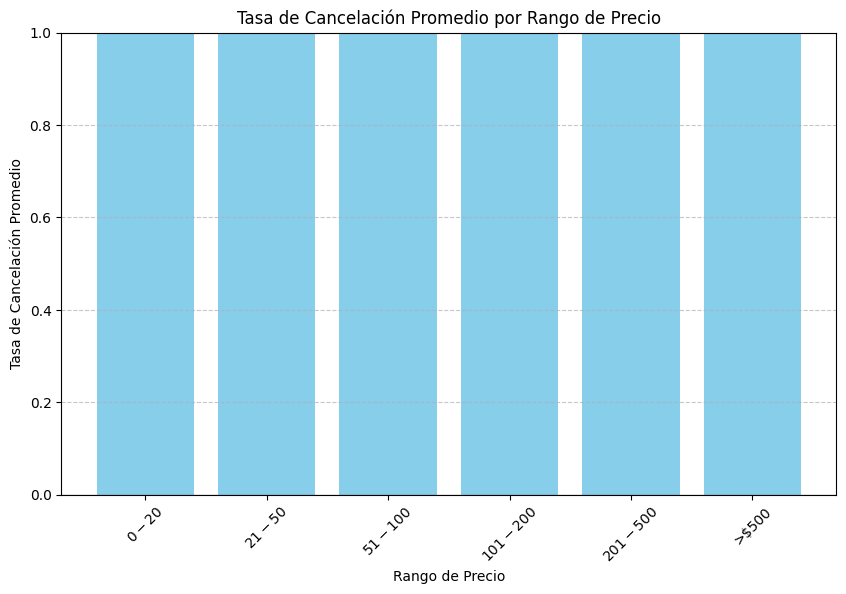

In [345]:
# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(tasa_cancelacion_rango['rango_precio'], tasa_cancelacion_rango['tasa_cancelacion'], color='skyblue')
plt.xlabel('Rango de Precio')
plt.ylabel('Tasa de Cancelación Promedio')
plt.title('Tasa de Cancelación Promedio por Rango de Precio')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Limitar el eje y entre 0 y 1 para una mejor visualización
plt.axhline(y=0, color='black', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#Convirtiendo cantidades negativas en positivas
df_canceladas_general['Quantity'] = df_canceladas_general['Quantity'].abs()

In [377]:
#Calcular cuantos productos suelen añadir al carro los que cancelan y los que concretan
#Calcular la tasa de productos por transaccion concretada
total_concretadas = df_concretadas_general.groupby('TransactionNo').agg(total_cantidad_concretadas=pd.NamedAgg(column='Quantity', aggfunc='sum')
).reset_index()

In [378]:
# Calcular el total de productos por Transaccion cancelada
total_canceladas = df_canceladas_general.groupby('TransactionNo').agg(total_cantidad_canceladas=pd.NamedAgg(column='Quantity', aggfunc='sum')
).reset_index()

In [379]:
#Calculando promedios
promedio_concretadas = total_concretadas['total_cantidad_concretadas'].mean()
promedio_canceladas = total_canceladas['total_cantidad_canceladas'].mean()


In [380]:
# Resultados
print(f"Promedio de productos en carritos concretados: {promedio_concretadas:,.2f}")
print(f"Promedio de productos en carritos cancelados: {promedio_canceladas:,.2f}")

Promedio de productos en carritos concretados: 282.54
Promedio de productos en carritos cancelados: 79.45


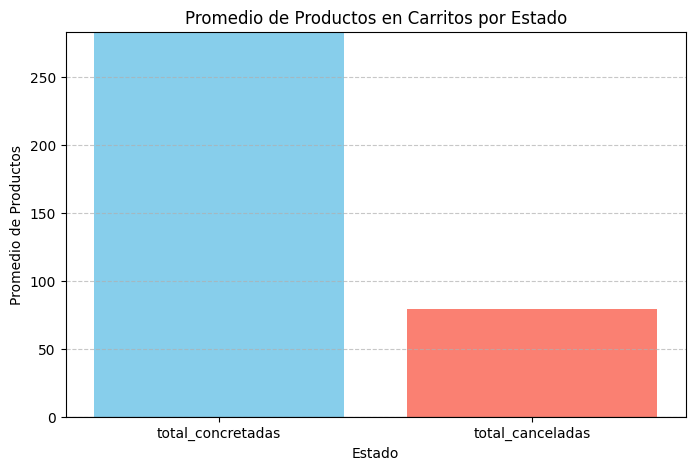

In [381]:
#Promedios 
promedio_concretadas = 282.54 
promedio_canceladas = 79.45

# Crear un DataFrame para los promedios
data = {
    'Estado': ['total_concretadas', 'total_canceladas'],
    'Promedio Productos': [promedio_concretadas, promedio_canceladas]
}
df_promedios = pd.DataFrame(data)

# Creación gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(df_promedios['Estado'], df_promedios['Promedio Productos'], color=['skyblue', 'salmon'])

# Configurar el gráfico
plt.title('Promedio de Productos en Carritos por Estado')
plt.xlabel('Estado')
plt.ylabel('Promedio de Productos')
plt.ylim(0, df_promedios['Promedio Productos'].max() + 1)  # Aumentar un poco el límite superior
plt.axhline(y=0, color='black', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico de promedio de carros concretados y abandonados
plt.show()


In [382]:
#Agrupar por fecha y contar cancelados
cancelado_por_fecha = df_canceladas_general.groupby('Date').size().reset_index(name='count')

In [ ]:
#df_canceladas_general ['Date'] = pd.to_datetime(df_canceladas_general['Date'])

In [402]:
#Agrupar por pais y fecha
cancelado_por_pais_fecha= df_canceladas_general.groupby(['Country', 'Date']).size().reset_index(name='count')

In [408]:
#Ordenar por pais y fecha
ordenados_pais_fecha = cancelado_por_pais_fecha.sort_values(by=['count','Country', 'Date'], ascending=[False, True, True])

In [409]:
#Lista de cantidad de cancelados por fecha
print(ordenados_pais_fecha)

            Country       Date  count
555  United Kingdom 2019-10-06    213
308             USA 2019-10-12    101
524  United Kingdom 2019-08-31     95
607  United Kingdom 2019-12-06     88
542  United Kingdom 2019-09-21     87
..              ...        ...    ...
302     Switzerland 2019-08-14      1
306     Switzerland 2019-10-04      1
307     Switzerland 2019-10-12      1
375  United Kingdom 2019-02-28      1
499  United Kingdom 2019-07-31      1

[611 rows x 3 columns]


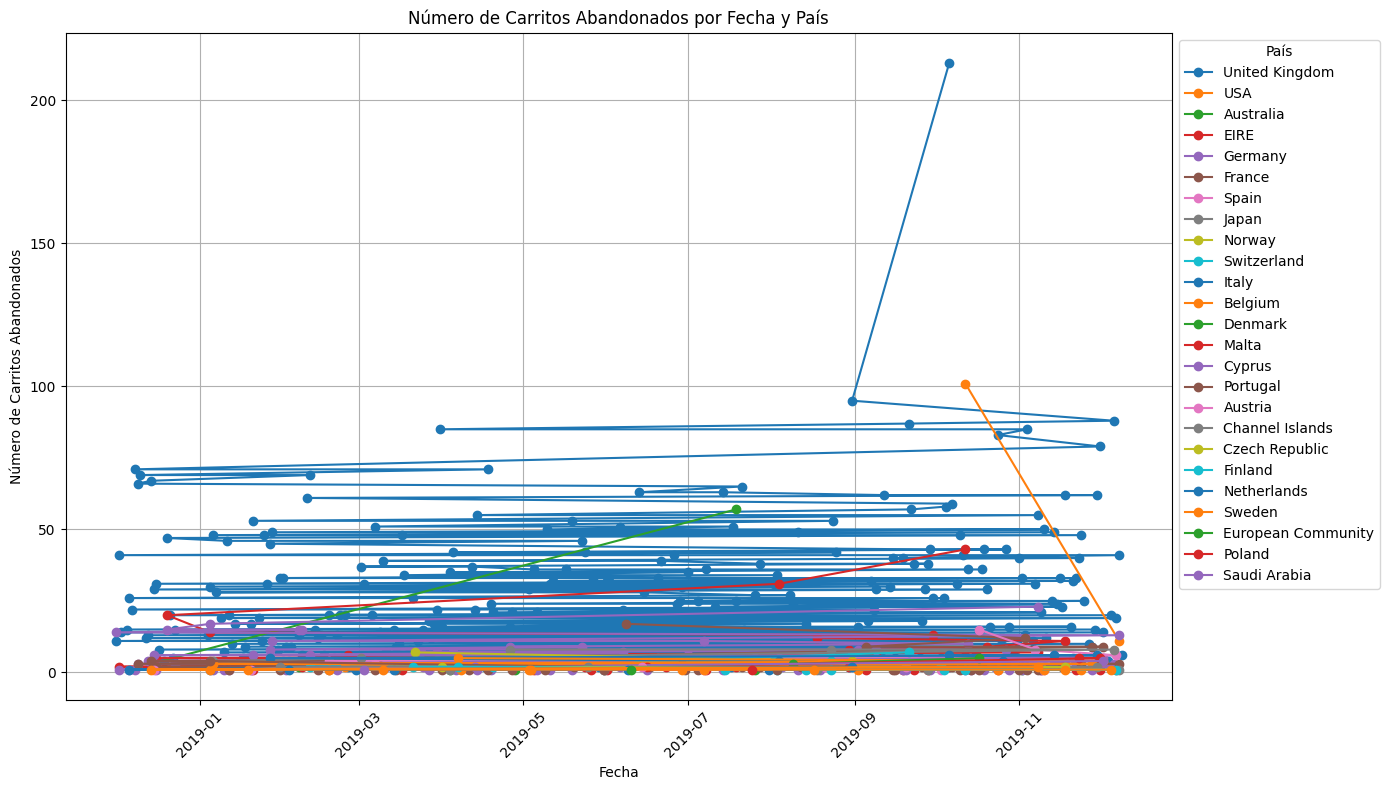

In [415]:
plt.figure(figsize=(14, 8))

# Graficar cada país
for pais in ordenados_pais_fecha['Country'].unique():
    datos_pais = ordenados_pais_fecha[ordenados_pais_fecha['Country'] == pais]
    plt.plot(datos_pais['Date'], datos_pais['count'], marker='o', linestyle='-', label=pais)

# Configurar el gráfico
plt.title('Número de Carritos Abandonados por Fecha y País')
plt.xlabel('Fecha')
plt.ylabel('Número de Carritos Abandonados')
plt.xticks(rotation=45)  # Rotar etiquetas
plt.grid()
plt.legend(title='País', bbox_to_anchor=(1, 1), loc='upper left')  # Colocar leyenda fuera del gráfico

# Mostrar el gráfico
plt.tight_layout()
plt.show()